# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []
cities_full= []
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city_full = citipy.nearest_city(lat_lng[0], lat_lng[1])
    city= city_full.city_name
    

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        #cities_full.append((lat_lng[0],lat_lng[1]))
        try:
            geo_url=f"https://api.openweathermap.org/geo/1.0/direct?q={city_full.city_name}&limit=1&appid=35915d3e493b51340aee2a2882910f4a"
            geo_data= requests.get(geo_url).json()
            cities_full.append({"name":geo_data[0]["name"].lower(),
                                "country_code":geo_data[0]["country"].lower(),
                                "lat":geo_data[0]["lat"],
                                "lon":geo_data[0]["lon"]})
        except:
            print(f"City {city} long lat not found")
            pass
        


# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

print(cities_full[:10])
print(cities[:10])

City bur gabo long lat not found
City tumannyy long lat not found
City cherskiy long lat not found
City taolanaro long lat not found
City bambanglipuro long lat not found
City beringovskiy long lat not found
City tazovskiy long lat not found
City kawana waters long lat not found
City lolua long lat not found
City sentyabrskiy long lat not found
City severo-yeniseyskiy long lat not found
City saleaula long lat not found
City toliary long lat not found
City saryshagan long lat not found
City kholodnyy long lat not found
City ningan long lat not found
City kachiry long lat not found
City zholymbet long lat not found
City paradwip long lat not found
City tabiauea long lat not found
City samalaeulu long lat not found
City naryan-mar long lat not found
City shache long lat not found
Number of cities in the list: 594
[{'name': 'nizhneyansk', 'country_code': 'ru', 'lat': 71.440445, 'lon': 136.130646}, {'name': 'bredasdorp', 'country_code': 'za', 'lat': -34.533055, 'lon': 20.042778}, {'name': '

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/"

units= 'imperial'

query_url= f'{url}weather?appid={weather_api_key}&units={units}'

# Define an empty list to fetch the weather data for each city
city_data = []


# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities_full):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{query_url}&lat={city["lat"]}&lon={city["lon"]}'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city["name"]))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city["country_code"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city["name"], 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | nizhneyansk
Processing Record 2 of Set 1 | bredasdorp
Processing Record 3 of Set 1 | cabo san lucas
Processing Record 4 of Set 1 | mataura
Processing Record 5 of Set 1 | yeppoon
Processing Record 6 of Set 1 | klaksvik
Processing Record 7 of Set 1 | victoria
Processing Record 8 of Set 1 | uzgen
Processing Record 9 of Set 1 | vaitape
Processing Record 10 of Set 1 | hermanus
Processing Record 11 of Set 1 | ballari
Processing Record 12 of Set 1 | vieux-habitants
Processing Record 13 of Set 1 | wanning
Processing Record 14 of Set 1 | saquena
Processing Record 15 of Set 1 | thule
Processing Record 16 of Set 1 | hobart
Processing Record 17 of Set 1 | iqaluit
Processing Record 18 of Set 1 | katobu
Processing Record 19 of Set 1 | atuona
Processing Record 20 of Set 1 | east london
Processing Record 21 of Set 1 | rikitea
Processing Record 22 of Set 1 | puerto ayora
Processing Record 23 of Set 1 | buenos air

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame.from_dict(city_data)

# Show Record Count
city_data_df.count()

City          571
Lat           571
Lng           571
Max Temp      571
Humidity      571
Cloudiness    571
Wind Speed    571
Country       571
Date          571
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,nizhneyansk,71.4404,136.1306,-45.81,100,65,4.36,ru,1675826744
1,bredasdorp,-34.5331,20.0428,64.87,81,8,6.60,za,1675826744
2,cabo san lucas,22.8939,-109.9201,69.31,59,75,0.00,mx,1675826469
3,mataura,-46.1927,168.8643,52.48,51,64,11.68,nz,1675826745
4,yeppoon,-23.1348,150.7437,84.22,65,96,21.47,au,1675826745


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("./output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,nizhneyansk,71.4404,136.1306,-45.81,100,65,4.36,ru,1675826744
1,bredasdorp,-34.5331,20.0428,64.87,81,8,6.60,za,1675826744
2,cabo san lucas,22.8939,-109.9201,69.31,59,75,0.00,mx,1675826469
3,mataura,-46.1927,168.8643,52.48,51,64,11.68,nz,1675826745
4,yeppoon,-23.1348,150.7437,84.22,65,96,21.47,au,1675826745


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

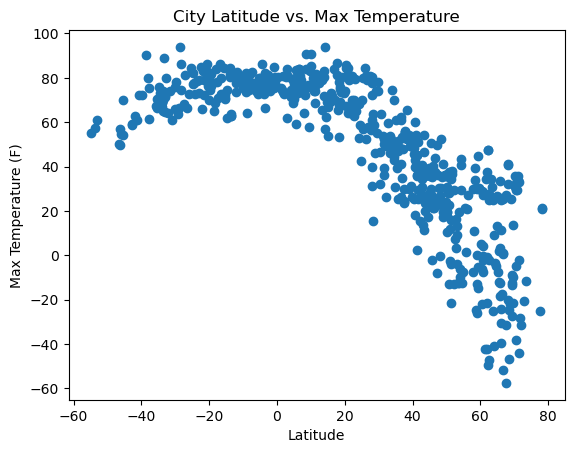

In [23]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"])

# Incorporate the other graph properties
plt.title('City Latitude vs. Max Temperature')
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
           
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

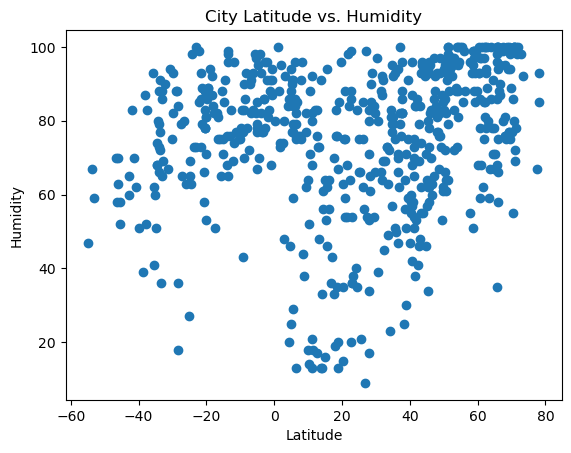

In [25]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"])

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity')
plt.ylabel('Humidity')
plt.xlabel('Latitude')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

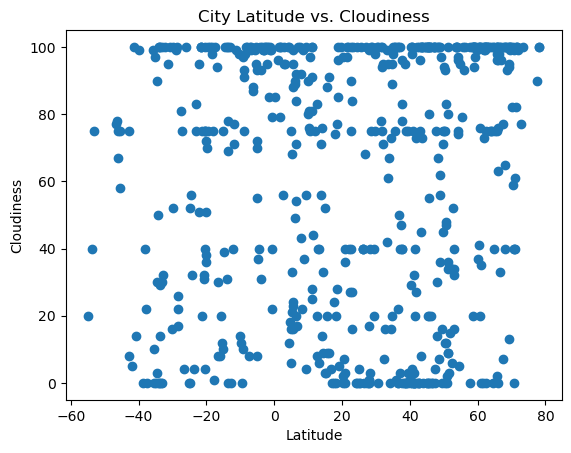

In [26]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"])

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness')
plt.ylabel('Cloudiness')
plt.xlabel('Latitude')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

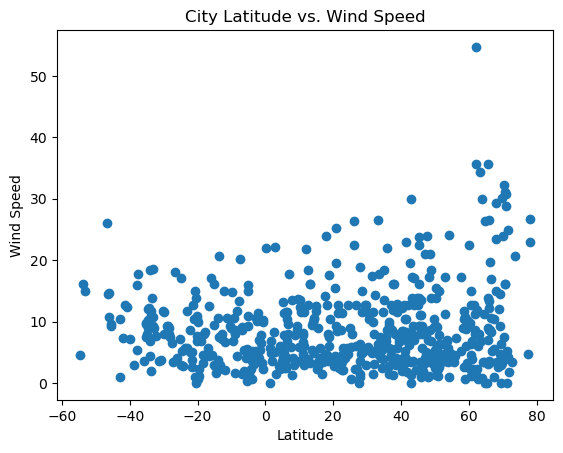

In [27]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"])

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed')
plt.ylabel('Wind Speed')
plt.xlabel('Latitude')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [28]:
# Define a function to create Linear Regression plots
def lin_reg_plot(x,y):
    linreg= linregress(x,y)
    plt.scatter(x,y,s=linreg.slope)
    plt.show()
    return linreg



lin_reg_plot(city_data_df["Lat"],city_data_df["Max Temp"])


In [29]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df= city_data_df[city_data_df['Lat'] >=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,saryagash,41.4501,69.1644,39.11,38,40,6.98,kz,1675809060
1,tasiilaq,65.6153,-37.6378,1.90,35,2,35.63,gl,1675809060
4,são filipe,14.8953,-24.4969,68.88,64,3,12.59,cv,1675809061
5,bethel,60.7922,-161.7558,-0.35,78,100,12.66,us,1675808785
6,ponta do sol,32.6811,-17.1041,59.70,69,16,5.37,pt,1675809061


In [38]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df= city_data_df[city_data_df['Lat'] <=0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,ushuaia,-54.8061,-68.3185,55.09,47,20,4.61,ar,1675809060
3,rikitea,-23.1230,-134.9680,78.85,73,83,11.70,fr,1675809060
9,faanui,-16.4824,-151.7338,79.72,75,30,12.46,fr,1675809062
10,moindou,-21.6924,165.6770,83.01,73,100,5.03,fr,1675809062
11,huarmey,-10.0687,-78.1522,75.24,75,14,8.90,pe,1675809063


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7067690616880407


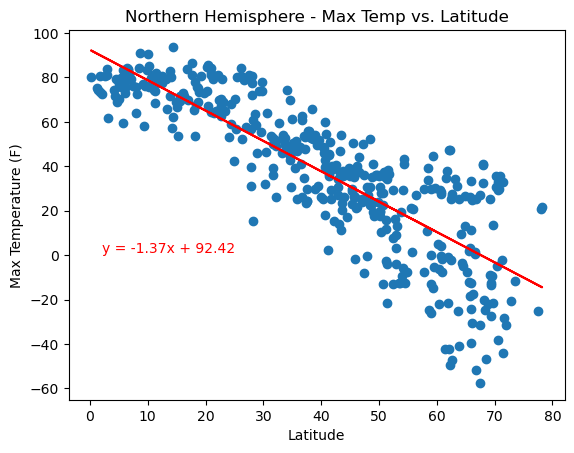

In [60]:
# Linear regression on Northern Hemisphere
north_x_temp= northern_hemi_df["Lat"]
north_y_temp= northern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_x_temp, north_y_temp)
regress_values = north_x_temp * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north_x_temp,north_y_temp)
plt.plot(north_x_temp,regress_values,"r-")
plt.title('Northern Hemisphere - Max Temp vs. Latitude')
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.annotate(line_eq,(2,1),fontsize= 10,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.show()



The r-squared is: 0.2689447672003938


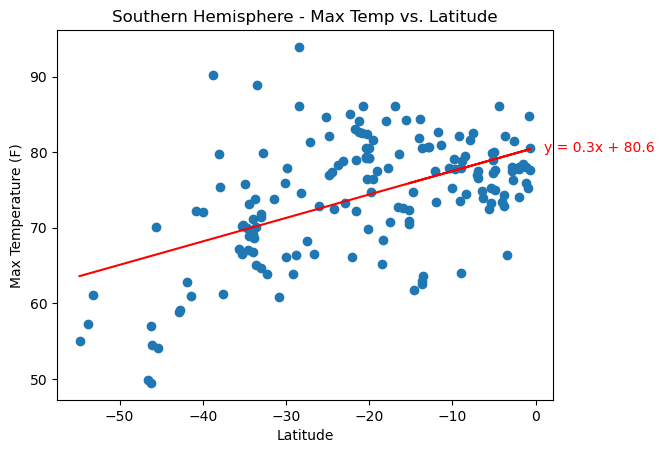

In [119]:
# Linear regression on Southern Hemisphere
south_x_temp= southern_hemi_df["Lat"]
south_y_temp= southern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_x_temp, south_y_temp)
regress_values = south_x_temp * slope + intercept
line_eq = "y = " + str(round(slope,1)) + "x + " + str(round(intercept,1))
plt.scatter(south_x_temp,south_y_temp)
plt.plot(south_x_temp,regress_values,"r-")
plt.title('Southern Hemisphere - Max Temp vs. Latitude')
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.annotate(line_eq,(1,80),fontsize= 10,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** The northern hemisphere has a relatively strong negative correlation between max temperature recordings and latitude. We can conclude that as the latitude increases in the northern hemisphere, the lower the temperature. In the southern hemisphere, we have a positive correlation that is not as strong as the correlation in the northern hemisphere. So, as the latitude in the southern hemisphere.increases, the higher the temperature.  

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.15506353289128572


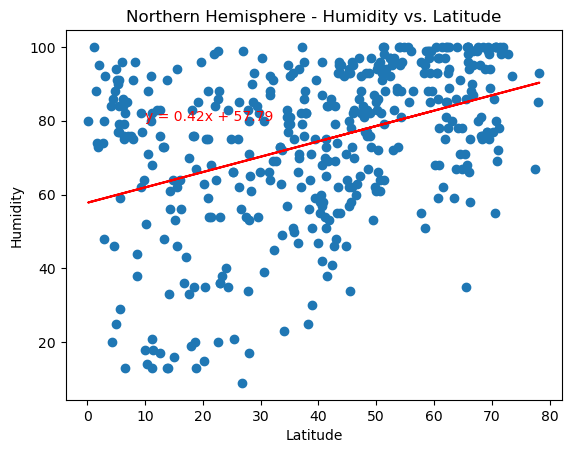

In [111]:
# Northern Hemisphere
north_x_hum= northern_hemi_df["Lat"]
north_y_hum= northern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_x_hum, north_y_hum)
regress_values = north_x_hum * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north_x_hum,north_y_hum)
plt.plot(north_x_hum,regress_values,"r-")
plt.title('Northern Hemisphere - Humidity vs. Latitude')
plt.ylabel('Humidity')
plt.xlabel('Latitude')
plt.annotate(line_eq,(10,80),fontsize= 10,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.show()


The r-squared is: 0.19901356428759368


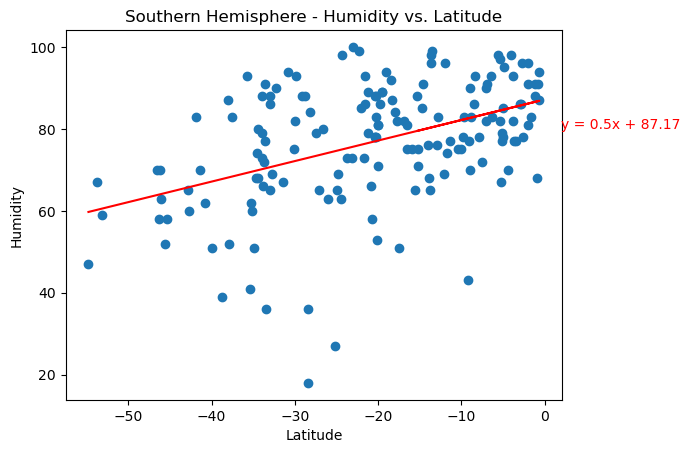

In [124]:
# Southern Hemisphere
south_x_hum= southern_hemi_df["Lat"]
south_y_hum= southern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_x_hum, south_y_hum)
regress_values = south_x_hum * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south_x_hum,south_y_hum)
plt.plot(south_x_hum,regress_values,"r-")
plt.title('Southern Hemisphere - Humidity vs. Latitude')
plt.ylabel('Humidity')
plt.xlabel('Latitude')
plt.annotate(line_eq,(2,80),fontsize= 10,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** For both the southern and northern hemisphere, we observe a very weak positive correlation between humidity and latitude. Although there is a weak correaltion, we notice, as the latitude nears the equator, the lesser the variance between points for humidity. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.03147581135709196


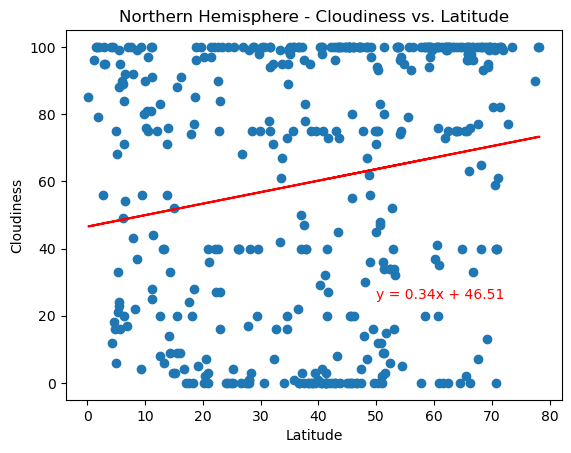

In [87]:
# Northern Hemisphere
north_x_cloud= northern_hemi_df["Lat"]
north_y_cloud= northern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_x_cloud, north_y_cloud)
regress_values = north_x_cloud * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north_x_cloud,north_y_cloud)
plt.plot(north_x_cloud,regress_values,"r-")
plt.title('Northern Hemisphere - Cloudiness vs. Latitude')
plt.ylabel('Cloudiness')
plt.xlabel('Latitude')
plt.annotate(line_eq,(50,25),fontsize= 10,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.07066117000427076


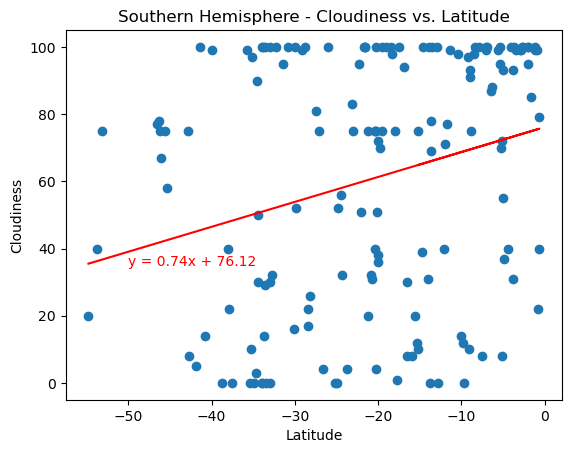

In [101]:
# Southern Hemisphere
south_x_cloud= southern_hemi_df["Lat"]
south_y_cloud= southern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_x_cloud, south_y_cloud)
regress_values = south_x_temp * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south_x_cloud,south_y_cloud)
plt.plot(south_x_cloud,regress_values,"r-")
plt.title('Southern Hemisphere - Cloudiness vs. Latitude')
plt.ylabel('Cloudiness')
plt.xlabel('Latitude')
plt.annotate(line_eq,(-50,35),fontsize= 10,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** There is no correlation between cloudiness and latitude. The level of cloudiness varies, regardlesss of the latittude of the location. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.023548582260081427


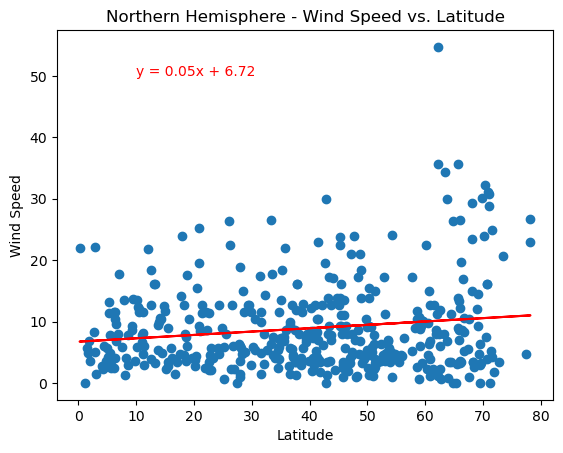

In [105]:
# Northern Hemisphere
north_x_wind= northern_hemi_df["Lat"]
north_y_wind= northern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_x_wind, north_y_wind)
regress_values = north_x_cloud * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north_x_wind,north_y_wind)
plt.plot(north_x_wind,regress_values,"r-")
plt.title('Northern Hemisphere - Wind Speed vs. Latitude')
plt.ylabel('Wind Speed')
plt.xlabel('Latitude')
plt.annotate(line_eq,(10,50),fontsize= 10,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.07599488433698791


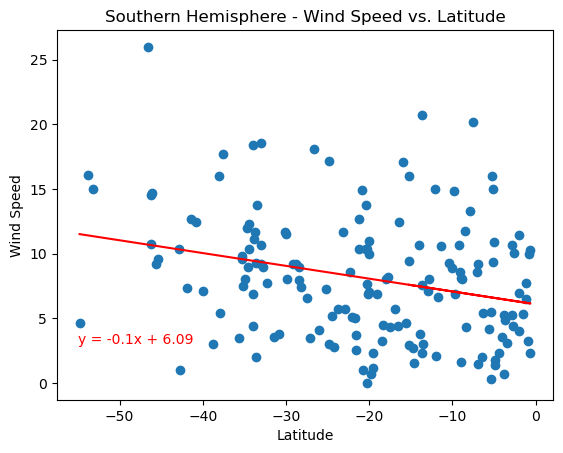

In [130]:
# Southern Hemisphere
south_x_wind= southern_hemi_df["Lat"]
south_y_wind= southern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_x_wind, south_y_wind)
regress_values = south_x_temp * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south_x_wind,south_y_wind)
plt.plot(south_x_wind,regress_values,"r-")
plt.title('Southern Hemisphere - Wind Speed vs. Latitude')
plt.ylabel('Wind Speed')
plt.xlabel('Latitude')
plt.annotate(line_eq,(-55,3),fontsize= 10,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** In the northern hemisphere, there is no correlation between wind speed and latitude. In the southern hemisphere, there is a weak negative correlation between wind speend and latitude. The wind speed slightly decreases as the latitude increases.